<a href="https://colab.research.google.com/github/kajalkattige30/DLProject/blob/main/TrafficSignRecognitionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO :

1. Pick a dataset
2. Download the dataset
3. Import the dataset using pytorch
4. Explore the dataset
5. Prepare the dataset for training.

Download the dataset

Using the opendatasets library, download the dataset from https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


In [1]:
!pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

In [5]:
od.download(dataset_url, force = True) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kajalkattige
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:04<00:00, 140MB/s]


### Import dataset into pytorch

In [6]:
dir = './gtsrb-german-traffic-sign/Train'

In [7]:
import os

In [8]:
os.listdir(dir)

['24',
 '7',
 '32',
 '36',
 '39',
 '26',
 '8',
 '21',
 '20',
 '5',
 '29',
 '14',
 '28',
 '37',
 '31',
 '4',
 '13',
 '6',
 '3',
 '38',
 '35',
 '18',
 '2',
 '30',
 '27',
 '33',
 '12',
 '25',
 '34',
 '42',
 '16',
 '17',
 '15',
 '11',
 '9',
 '41',
 '23',
 '10',
 '19',
 '22',
 '1',
 '0',
 '40']

In [9]:
len(os.listdir(dir))

43

There are 43 classes in total.

#### Loading the dataset into pytorch

In [10]:
from torchvision.datasets import  ImageFolder

In [11]:
dataset = ImageFolder(dir)

In [12]:
len(dataset)

39209

Dataset contains 39209 images of traffic signs.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

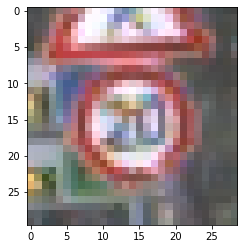

In [14]:
img, label = dataset[0]
plt.imshow(img)

Above plot shows image of dataset[0] before any transformation.

Code to apply trasformations -

To view it as a pytorch tensor -

tt.Compose is used to apply a bunch of transformations in order. When we are building a deep learning model, we need all the images to be of the same size. We are using randomCrop because this will crop the images randomly and introduce some randomization into the dataset.

In [34]:
import torchvision.transforms as tt
dataset = ImageFolder(dir, tt.Compose([tt.Resize(64), tt.RandomCrop(64), tt.ToTensor()]))

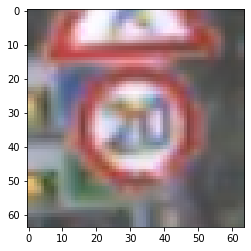

In [36]:
img, label = dataset[0]
plt.imshow(img.permute(1, 2, 0))

Above plot shows image of dataset[o] after applying transformations.

#### Splitting the dataset into two parts - Validation and Training dataset.

In [37]:
val_percent = 0.1
val_size = int(val_percent*len(dataset))
train_size = len(dataset) - val_size
train_size, val_size

(35289, 3920)

In [38]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset), len(val_dataset)

(35289, 3920)

Next step is to create dataloaders, to work with data in batches.

For validation dataset, there's no requirement of shuffling.

In [39]:
from torch.utils.data import DataLoader
batch_size = 128
train_DataLoader = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_DataLoader = DataLoader(val_dataset, batch_size, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [40]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


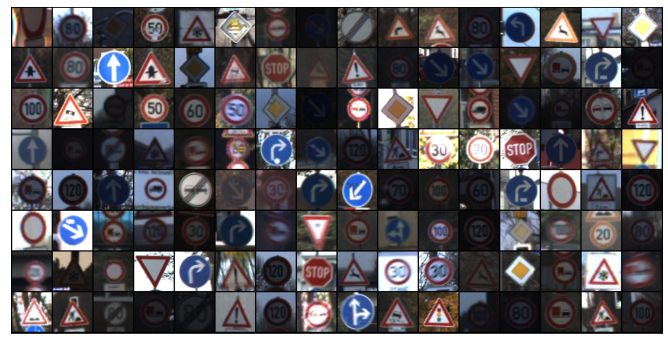

In [41]:
show_batch(train_DataLoader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


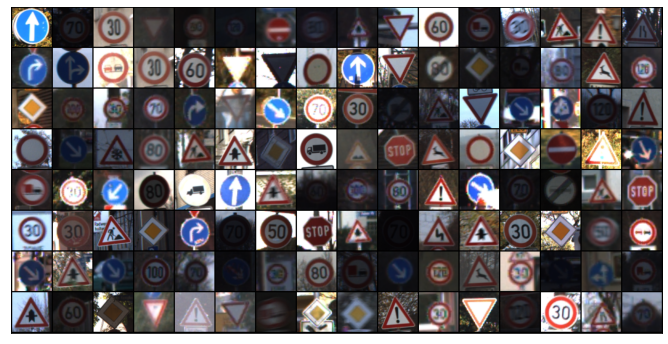

In [42]:
show_batch(val_DataLoader)

### Utility Functions and Classes
GPU utilities

We have some helper functions to move the data onto the gpu.



In [43]:
import torch
def get_default_device(): # This function is going to pick a gpu if one is available, otherwise it's going to pick a cpu, it will give a pointer to a device based on what is available.
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device): # This function is used to move data to a particular device.
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(): # This function is used to wrap dataloaders so that when batches of data are being requested, they are dynamically loaded onto the gpu
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

To check if gpu is available

In [44]:
import torch
torch.cuda.is_available()

True

In [45]:
import torch
torch.cuda.is_available()

True

To find device:

In [46]:
device = get_default_device()
device

device(type='cuda')

Cuda is the language that is used to communicate with the gpu => We now have access to the gpu.

Let say we want to move an image tensor to a device:

In [47]:
img, label = dataset[0]

In [48]:
img

tensor([[[0.3137, 0.3098, 0.3059,  ..., 0.2863, 0.2902, 0.2941],
         [0.3255, 0.3216, 0.3176,  ..., 0.3020, 0.3098, 0.3137],
         [0.3137, 0.3137, 0.3216,  ..., 0.2980, 0.3059, 0.3098],
         ...,
         [0.3490, 0.3529, 0.3569,  ..., 0.4000, 0.3765, 0.3686],
         [0.3373, 0.3451, 0.3569,  ..., 0.3843, 0.3647, 0.3569],
         [0.3333, 0.3412, 0.3569,  ..., 0.3765, 0.3608, 0.3529]],

        [[0.3216, 0.3176, 0.3137,  ..., 0.2941, 0.2941, 0.2941],
         [0.3255, 0.3255, 0.3176,  ..., 0.3098, 0.3137, 0.3137],
         [0.3176, 0.3176, 0.3216,  ..., 0.3020, 0.3059, 0.3098],
         ...,
         [0.3569, 0.3647, 0.3765,  ..., 0.4157, 0.4039, 0.3961],
         [0.3373, 0.3490, 0.3725,  ..., 0.4000, 0.3882, 0.3843],
         [0.3294, 0.3412, 0.3725,  ..., 0.3922, 0.3843, 0.3804]],

        [[0.3294, 0.3255, 0.3216,  ..., 0.2863, 0.2863, 0.2902],
         [0.3333, 0.3333, 0.3255,  ..., 0.2980, 0.3020, 0.3059],
         [0.3255, 0.3255, 0.3294,  ..., 0.2863, 0.2941, 0.

To see image transformation -

In [49]:
img.shape

torch.Size([3, 64, 64])

In [50]:
img.device

device(type='cpu')

Above command is to check device, by default it on cpu

In [51]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

Wrapping our dataloaders with the device. Whenever batches are requested, those batches of data will be on the gpu.

In [52]:
train_DataLoader = DeviceDataLoader(train_DataLoader, device)
val_DataLoader = DeviceDataLoader(val_DataLoader, device)

### Model and Training utilities
Image classification problem is divided into single label classification and multi-label classification problem.

single-image classification - each image contains only one type of flower. multi-image classification - each image contains different flowers.

In [53]:
import torch.nn as nn
import torch.nn.functional as F
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
      "calculate loss for a batch of training data"
      images, labels = batch 
      out = self(images)                  # Generate predictions
      loss = F.cross_entropy(out, labels) # Calculate loss
                                          # For single label classification problem, we use cross entropy as the loss function, and for multi-label classification problem we use binary cross entropy as loss function , For regression problem, we use MSE as loss function
      return loss
    
    def validation_step(self, batch):
      "calculate loss and accuracy for a batch of validation data"
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = F.cross_entropy(out, labels)   # Calculate loss
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs): #This function gives the overall loss and overall accuracy for validation set
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result): #Print information at the end of each epoch
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [54]:
@torch.no_grad()
def evaluate(model, val_loader):
  """evaluates the model's performance on the validation set"""
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Model
(Using resnet 9 architecture)

In [55]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)
    
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input : 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 128 x 128 x 32 x 32, # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))# 128 x 512 x 8 x 8, # 128 x 512 x 8 x 8
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1
                                        nn.Flatten(), # 128 x 2048 (In a batch of size 128, each image has been converted into a vector of size 2048) # Now size is changed to 128 x 512
                                        nn.Dropout(0.2), # Dropout doesn't change anything
                                        nn.Linear(512, num_classes)) # Linear layer only access 512 input
        # To solve the above problem, we have to make our model generic so that it can work with any size of image. To do this, we need to use AdaptiveMaxPool2d
        # All modern pretrained models have an Adaptive pooling layer
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

Instantiating the model

In [56]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

For the first convolutional layer, weights of the convolutional layer are on the device CUDA



In [57]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Pass one batch of input tensors throught the model

One thing to do before training the model is to try and pass one batch of data through model and see if everything is set up properly.

In [59]:
torch.cuda.empty_cache()
for batch in train_DataLoader:
  images, labels = batch
  print('images.shape', images.shape)
  print('images.device', images.device)
  preds = model(images)
  print('preds.shape', preds.shape)
  # print(preds)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 43])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


For each image, we are getting 43 outputs, and in image classfication the 43 outputs are interpreted as the probabilities of the 43 classes. Class with highest probability is taken as result.

### Training

In [61]:
history = [evaluate(model, val_DataLoader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.011542338877916336, 'val_loss': 3.7594680786132812}]

In [63]:
history += fit(5, 0.001, model, train_DataLoader, val_DataLoader, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.7874, val_loss: 0.0818, val_acc: 0.9794
Epoch [1], train_loss: 0.0469, val_loss: 0.0081, val_acc: 0.9982
Epoch [2], train_loss: 0.0186, val_loss: 0.0176, val_acc: 0.9947
Epoch [3], train_loss: 0.0147, val_loss: 0.0161, val_acc: 0.9950
Epoch [4], train_loss: 0.0060, val_loss: 0.0113, val_acc: 0.9967


We are getting an accuracy of 99.6%

In [65]:
history += fit(5, 0.001, model, train_DataLoader, val_DataLoader, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0383, val_loss: 0.0073, val_acc: 0.9987
Epoch [1], train_loss: 0.0096, val_loss: 0.0027, val_acc: 0.9995
Epoch [2], train_loss: 0.0218, val_loss: 0.0426, val_acc: 0.9892
Epoch [3], train_loss: 0.0156, val_loss: 0.0033, val_acc: 0.9987
Epoch [4], train_loss: 0.0123, val_loss: 0.0135, val_acc: 0.9962


In [76]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

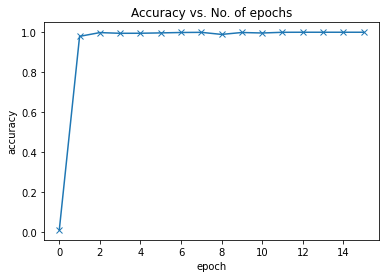

In [77]:
plot_accuracies(history)

In [78]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

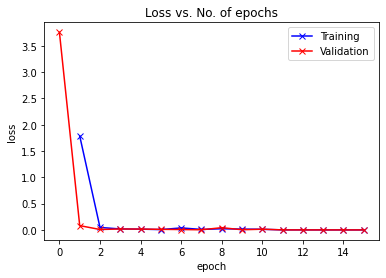

In [79]:
plot_losses(history)

When you see your training loss or validation loss to flatten out, you can reduce your learning rate by a factor of 10 because then your model is already near optimal value and it is just bouncing off.

At some point, you will see validation loss going up. This is the point where the model is starting to overfit. Overfitting is not when training loss is less than validation loss. Training loss is always going to be less than the validation loss if you are going to train your model long enough, because your model has seen the training data and training data is used to perform gradient descent.



### Test with individual images

In [71]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [72]:
def show_image_prediction(img, label):
  plt.imshow(img.permute((1, 2, 0)))
  pred = predict_image(img, model, dataset.classes)
  print('Target:', dataset.classes[label])
  print('Prediction:', pred)


Target: 4
Prediction: 4


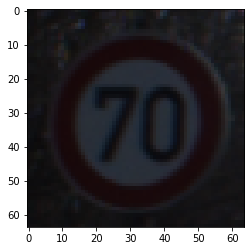

In [75]:
show_image_prediction(*val_dataset[425])